In [ ]:
GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/CriminalandNonCriminals/"
training_data_dir = path + "Train" 
test_data_dir = path + "Test"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.callbacks import LearningRateScheduler
from keras.metrics import *
# v4

ACCURACY_LIST = []
from keras.applications.resnet50 import ResNet50
from keras.layers import GlobalMaxPooling2D
from keras.models import Model
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

from matplotlib import pyplot as plt
from keras.models import Sequential,Model,model_from_json
from keras.layers import Convolution2D,MaxPool2D,BatchNormalization,Flatten,Dense,Dropout,Input,Layer
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import image
from sklearn.metrics import confusion_matrix,classification_report,f1_score
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
print ("ok")

ok


In [ ]:
import keras.backend as K
K.clear_session()

In [ ]:
img_width, img_height = 75,75
nb_train_samples = 2492
nb_validation_samples = 1222
batch_size = 4
epochs = 50
print ("ok")

ok


In [ ]:
# Initiate the train and test generators with data Augumentation 
train_datagen = ImageDataGenerator(
rescale = 1./255,
fill_mode = "nearest",
zoom_range = 0.3)

test_datagen = ImageDataGenerator(
rescale = 1./255,
fill_mode = "nearest",
zoom_range = 0.3)

In [ ]:
train_generator = train_datagen.flow_from_directory(
training_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
class_mode = "categorical")

Found 2492 images belonging to 2 classes.
Found 1222 images belonging to 2 classes.


In [ ]:
model = applications.InceptionV3(weights = 'imagenet', include_top=False, input_shape = (img_width, img_height, 3))

In [ ]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting
METRICS = [ 
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
]

In [ ]:

# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in model.layers[:5]:
    layer.trainable = False

x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(2, activation="sigmoid")(x)
# creating the final model 
model = Model(input = model.input, output = predictions)

# compile the model 
model.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=['accuracy'])

In [ ]:
from keras.callbacks import CSVLogger
TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"

In [ ]:
!pip install livelossplot

In [ ]:
from livelossplot.keras import PlotLossesCallback
history=model.fit_generator(train_generator,
                         steps_per_epoch = 2492,
                         epochs = 30,
                         validation_data=validation_generator,
                         validation_steps=1222,
                         callbacks=[PlotLossesCallback(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")], 
    verbose=1)

Using TensorFlow backend.


NameError: ignored

In [ ]:
fig = plt.figure(figsize=(4, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()
fig.savefig('Log Loss Using Inception V3.png', dpi=fig.dpi)

NameError: ignored

In [ ]:
fig = plt.figure(figsize=(4, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()
fig.savefig('AccuracyUsingInceptionv3.png',format='png', dpi=1200)

NameError: ignored

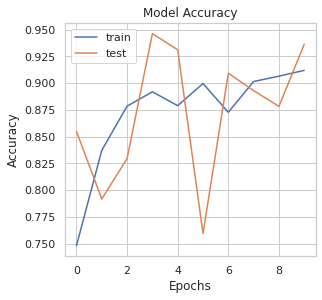

In [ ]:
fig = plt.figure(figsize=(4, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()
fig.savefig('Accuracy using VGG19 .png', dpi=fig.dpi)

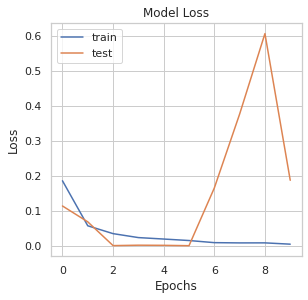

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(4, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()
plt.savefig('Log Loss using Vgg19.eps', format='eps')

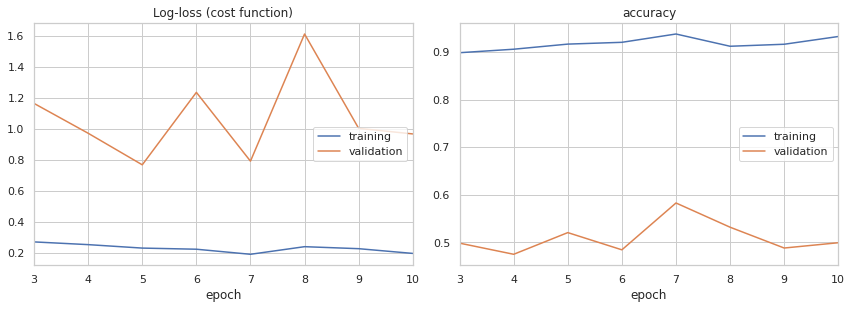

Log-loss (cost function):
training   (min:    0.192, max:    0.524, cur:    0.197)
validation (min:    0.769, max:   19.045, cur:    0.969)

accuracy:
training   (min:    0.725, max:    0.938, cur:    0.932)
validation (min:    0.475, max:    0.583, cur:    0.499)


In [ ]:
from livelossplot.keras import PlotLossesCallback
history=model.fit_generator(train_generator,
                         steps_per_epoch = 2492,
                         epochs = 10,
                         validation_data=validation_generator,
                         validation_steps=1222,
                         callbacks=[PlotLossesCallback(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")], 
    verbose=1)

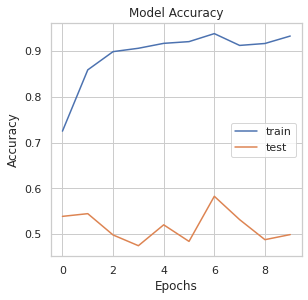

In [ ]:
fig = plt.figure(figsize=(4, 4))
fig.savefig('AccuracyUsingInceptionV3.svg',format='svg', dpi=1200)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()
fig.savefig('AccuracyUsingInceptionV3.svg',format='svg', dpi=1200)

In [ ]:
filenames = os.listdir("/content/drive/My Drive/CriminalandNonCriminals/Train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Criminal':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
df.head()

,filename,category
0,Criminal,1
1,Not Criminal,0


In [ ]:
df.tail()

,filename,category
0,Criminal,1
1,Not Criminal,0


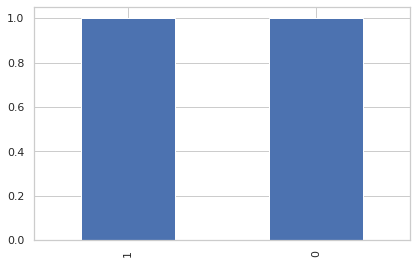

In [ ]:
df['category'].value_counts().plot.bar()

In [ ]:
import os
print(os.listdir('/content/drive/My Drive/CriminalandNonCriminals'))

['Train', 'Test']


In [ ]:
X=[]
Z=[]
IMG_SIZE=64
Criminal='/content/drive/My Drive/CriminalandNonCriminals/Train/Criminal'
NotCriminal='/content/drive/My Drive/CriminalandNonCriminals/Train/Not Criminal'

In [ ]:
def assign_label(img,flower_type):
    return flower_type
    

In [ ]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
make_train_data('Criminal',Criminal)
print(len(X))

100%|██████████| 1100/1100 [10:10<00:00,  1.80it/s]

1100


In [ ]:
make_train_data('NotCriminal',NotCriminal)
print(len(X))

100%|██████████| 1392/1392 [12:29<00:00,  1.86it/s]

2492


In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
X=np.array(X)
X=X/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
np.random.seed(42)
rn.seed(42)


In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(2, activation = "sigmoid"))

In [ ]:
batch_size=16
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [ ]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
datagen.fit(x_train)

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 96)         

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 50, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
116/116 [==============================] - 10s 82ms/step - loss: 0.4300 - accuracy: 0.7852 - val_loss: 0.2455 - val_accuracy: 0.9005
Epoch 2/50
116/116 [==============================] - 2s 21ms/step - loss: 0.3147 - accuracy: 0.8635 - val_loss: 0.1852 - val_accuracy: 0.9486
Epoch 3/50
116/116 [==============================] - 3s 22ms/step - loss: 0.3152 - accuracy: 0.8705 - val_loss: 0.1847 - val_accuracy: 0.9454
Epoch 4/50
116/116 [==============================] - 3s 22ms/step - loss: 0.2184 - accuracy: 0.9228 - val_loss: 0.1645 - val_accuracy: 0.9342
Epoch 5/50
116/116 [==============================] - 3s 22ms/step - loss: 0.1678 - accuracy: 0.9401 - val_loss: 0.1533 - val_accuracy: 0.9583
Epoch 6/50
116/116 [==============================] - 3s 22ms/step - loss: 0.2565 - accuracy: 0.9034 - val_loss: 0.1182 - val_accuracy: 0.9615
Epoch 7/50
116/116 [==============================] - 2s 21ms/step - loss: 0.1532 - accuracy: 0.9406 - val_loss: 0.0997 - val_accuracy: 0.963

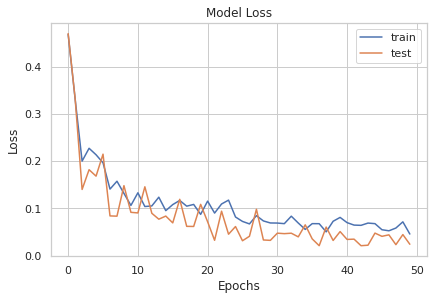

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

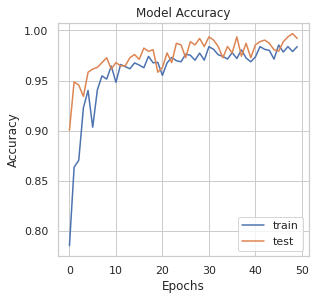

In [ ]:
fig = plt.figure(figsize=(4, 4))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

fig.savefig('AccuracyUsingInceptionV3.svg',format='svg', dpi=1200)

In [ ]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [ ]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

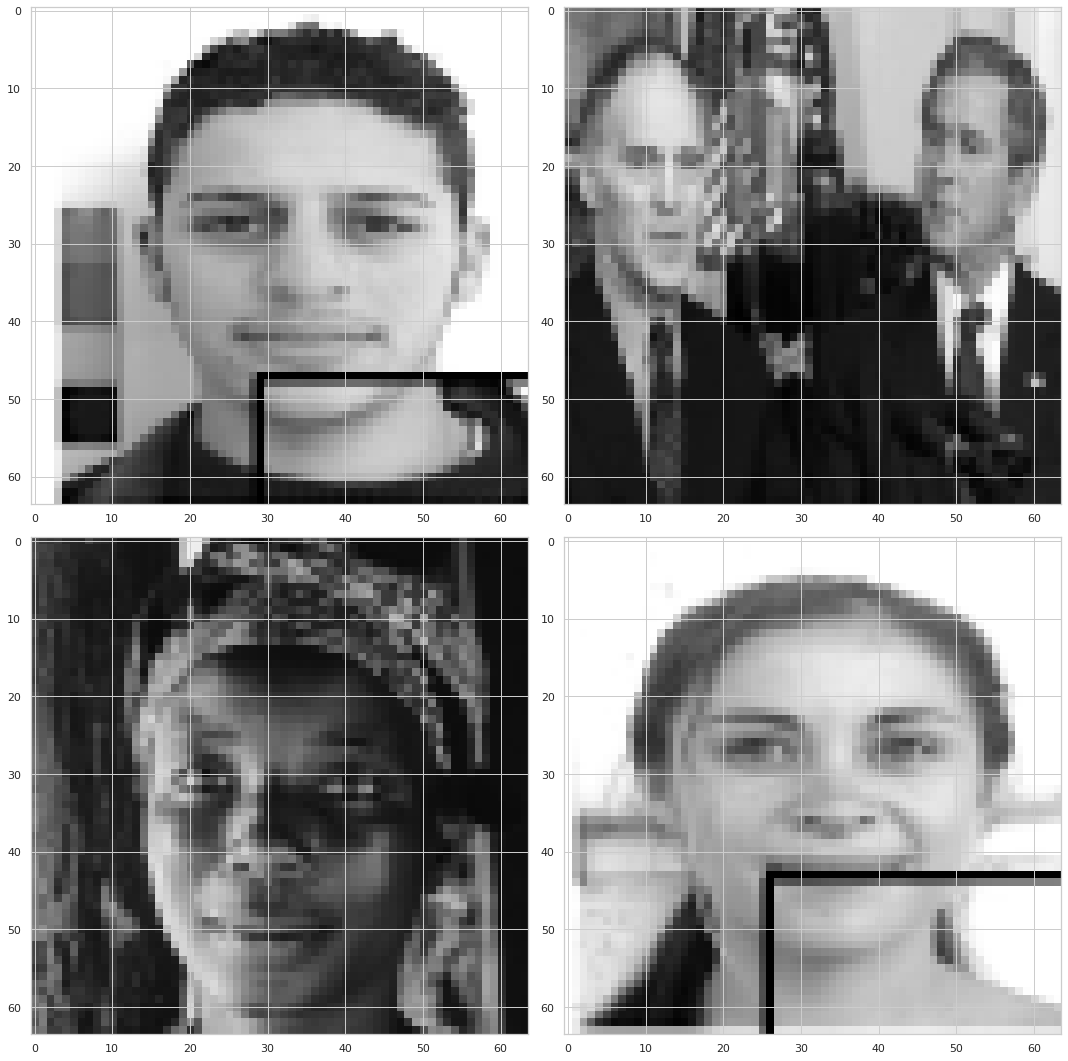

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(2,2)
fig.set_size_inches(15,15)
for i in range (2):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
    #    ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[prop_class[count]]]))))
        plt.tight_layout()
        count+=1

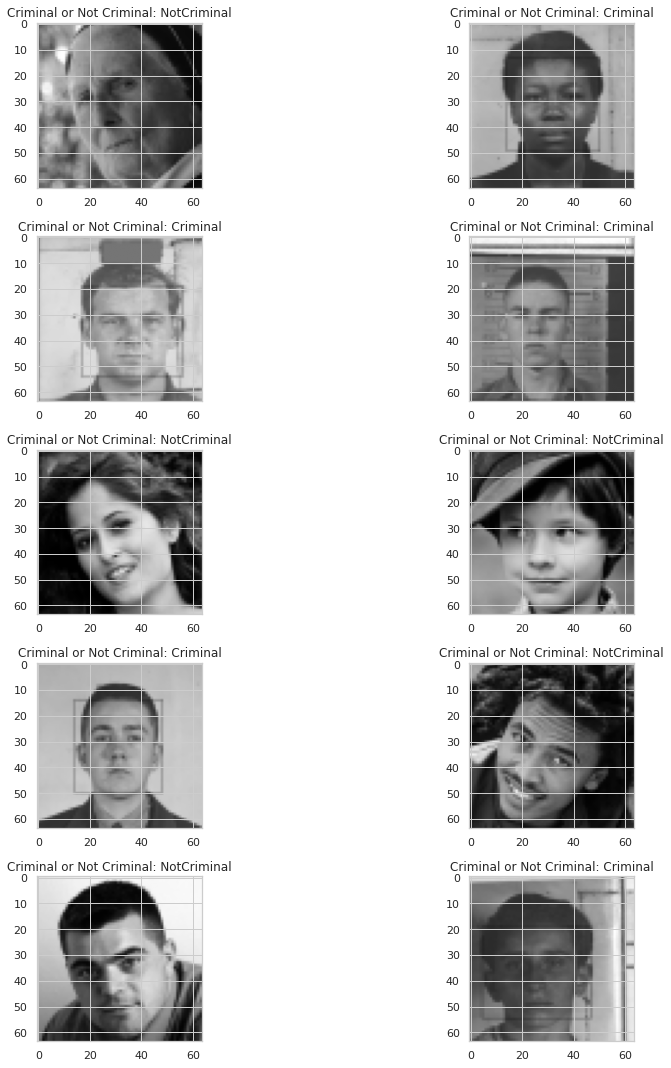

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Criminal or Not Criminal: '+Z[l])
        
plt.tight_layout()
        

In [ ]:
model.save('CriminalorNot.h5')

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
#prepare data for metrics
y_hat=loaded_model.predict(x_test)
y_hat=[np.argmax(xx) for xx in y_hat]
y_true=[np.argmax(xx) for xx in y_test]

In [ ]:
print(confusion_matrix(y_pred=y_hat,y_true=y_true))

[[272   0]
 [  6 345]]


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

from matplotlib import pyplot as plt
from keras.models import Sequential,Model,model_from_json
from keras.layers import Convolution2D,MaxPool2D,BatchNormalization,Flatten,Dense,Dropout,Input,Layer
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import image
from sklearn.metrics import confusion_matrix,classification_report,f1_score
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings

In [ ]:
print(classification_report(y_pred=y_hat,y_true=y_true))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       272
           1       1.00      0.98      0.99       351

    accuracy                           0.99       623
   macro avg       0.99      0.99      0.99       623
weighted avg       0.99      0.99      0.99       623



In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [ ]:
class_names = ['Criminal', 'Not Criminal']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)


In [ ]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['/content/drive/My Drive/CriminalandNonCriminals/Train', '/content/drive/My Drive/CriminalandNonCriminals/Test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  2%|▏         | 20/1100 [00:00<00:05, 198.39it/s]

Loading /content/drive/My Drive/CriminalandNonCriminals/Train


  4%|▍         | 33/800 [00:00<00:02, 324.33it/s]

Loading /content/drive/My Drive/CriminalandNonCriminals/Test


100%|██████████| 422/422 [00:01<00:00, 293.51it/s]


In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [ ]:

n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 2492
Number of testing examples: 1222
Each image is of size: (64, 64)


In [ ]:
 train_labels.value_counts()

AttributeError: ignored

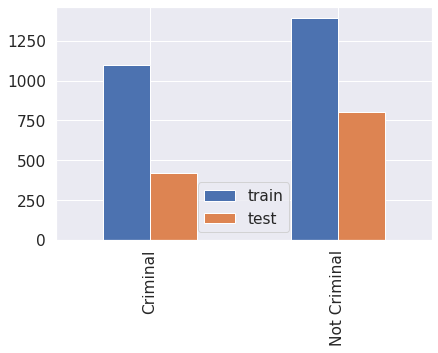

In [ ]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

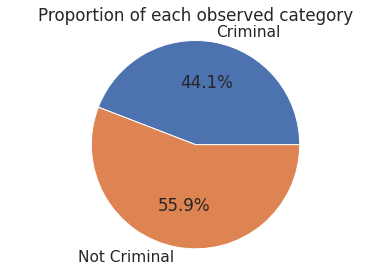

In [ ]:
plt.pie(train_counts,
        explode=(0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


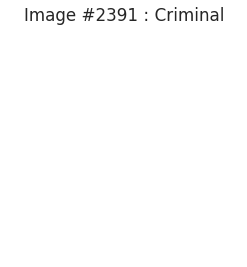

In [ ]:
display_random_image(class_names, train_images, train_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (64 ,64, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
16/16 [==============================] - 0s 18ms/step - loss: 1.0573 - accuracy: 0.4260 - val_loss: 0.6931 - val_accuracy: 0.4850
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6931 - accuracy: 0.4305 - val_loss: 0.6931 - val_accuracy: 0.4850
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.4305 - val_loss: 0.6931 - val_accuracy: 0.4850
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.4305 - val_loss: 0.6931 - val_accuracy: 0.4850
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6931 - accuracy: 0.4305 - val_loss: 0.6931 - val_accuracy: 0.4850
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.4305 - val_loss: 0.6931 - val_accuracy: 0.4850
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.4305 - val_loss: 0.6931 - val_accuracy: 0.4850
Epoch 8/20
16

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

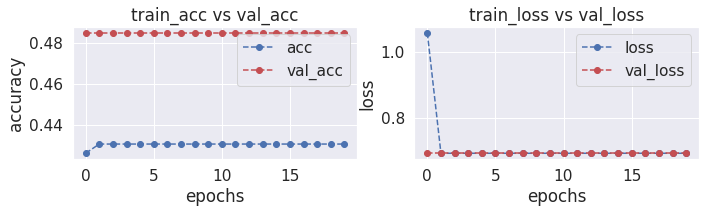

In [ ]:
plot_accuracy_loss(history)

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

39/39 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3453


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Epoch 1/15
16/16 [==============================] - 0s 9ms/step - loss: 2.6340 - accuracy: 0.8118 - val_loss: 0.5595 - val_accuracy: 0.9459
Epoch 2/15
16/16 [==============================] - 0s 5ms/step - loss: 0.2983 - accuracy: 0.9558 - val_loss: 0.3444 - val_accuracy: 0.9679
Epoch 3/15
16/16 [==============================] - 0s 5ms/step - loss: 0.0989 - accuracy: 0.9819 - val_loss: 0.2670 - val_accuracy: 0.9739
Epoch 4/15
16/16 [==============================] - 0s 6ms/step - loss: 0.0271 - accuracy: 0.9930 - val_loss: 0.2416 - val_accuracy: 0.9619
Epoch 5/15
16/16 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 0.9970 - val_loss: 0.2232 - val_accuracy: 0.9699
Epoch 6/15
16/16 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.9990 - val_loss: 0.2154 - val_accuracy: 0.9739
Epoch 7/15
16/16 [==============================] - 0s 5ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.2064 - val_accuracy: 0.9739
Epoch 8/15
16/16 [==

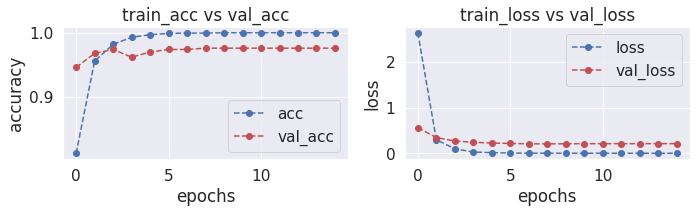

In [ ]:
plot_accuracy_loss(history2)

In [ ]:
test_loss = model2.evaluate(test_features, test_labels)

39/39 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.9624


In [ ]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [ ]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [ ]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Epoch 1/10
15/15 [==============================] - 0s 10ms/step - loss: 3.5247 - accuracy: 0.7724 - val_loss: 0.5691 - val_accuracy: 0.9100
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.3056 - accuracy: 0.9598 - val_loss: 0.1416 - val_accuracy: 0.9750
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0908 - accuracy: 0.9849 - val_loss: 0.0581 - val_accuracy: 0.9950
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0228 - accuracy: 0.9944 - val_loss: 0.0546 - val_accuracy: 0.9900
Epoch 5/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.0560 - val_accuracy: 0.9900
Epoch 6/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0511 - val_accuracy: 0.9900
Epoch 7/10
15/15 [==============================] - 0s 4ms/step - loss: 6.1142e-04 - accuracy: 1.0000 - val_loss: 0.0517 - val_accuracy: 0.9900
Epoch 8/10
15/1

In [ ]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.9729950900163666


In [ ]:
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,AveragePooling2D

In [ ]:
# example of loading the inception v3 model
from keras.applications.inception_v3 import InceptionV3
# load model
model = applications.InceptionV3(weights = "imagenet", include_top=False, input_shape = (75, 75, 3))
# summarize the model

In [ ]:
#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(2, activation="sigmoid")(x)
# creating the final model 
model = Model(input = model.input, output = predictions)

# compile the model 
model.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=METRICS)

In [ ]:

!pip install livelossplot

In [ ]:

from keras.callbacks import CSVLogger
TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"

In [ ]:
from livelossplot.keras import PlotLossesCallback
history=model.fit_generator(train_generator,
                         steps_per_epoch = 2492,
                         epochs = 10,
                         validation_data=validation_generator,
                         validation_steps=1222,
                         callbacks=[PlotLossesCallback(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")], 
    verbose=1)

Epoch 1/10


ValueError: ignored

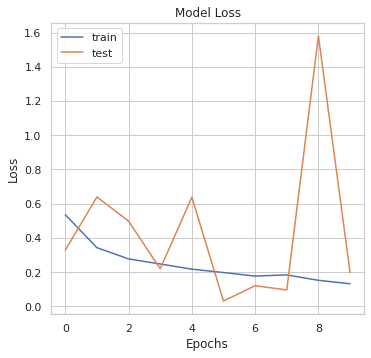

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()
fig.savefig('Log Loss Using Inception V3.png', dpi=fig.dpi)

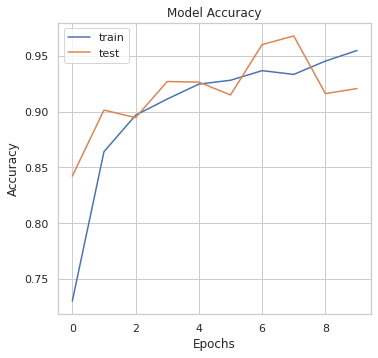

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()
fig.savefig('Accuracy Using Inception V3.png', dpi=fig.dpi)

In [ ]:
model = applications.VGG16(weights = 'imagenet', include_top=False, input_shape = (img_width, img_height, 3))

In [ ]:
# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in model.layers[:5]:
    layer.trainable = False

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(2, activation="sigmoid")(x)
# creating the final model 
model = Model(input = model.input, output = predictions)

# compile the model 
model.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=METRICS)

In [ ]:
from livelossplot.keras import PlotLossesCallback
history=model.fit_generator(train_generator,
                         steps_per_epoch = 2492,
                         epochs = 10,
                         validation_data=validation_generator,
                         validation_steps=1222,
                         callbacks=[PlotLossesCallback(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")], 
    verbose=1)

Epoch 1/10


InvalidArgumentError: ignored

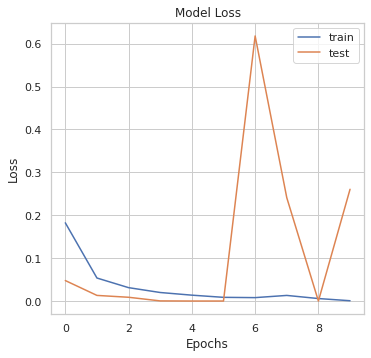

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(4, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()
plt.savefig('Log Loss of Vgg16.png', dpi = fig.dpi)

In [ ]:
fig = plt.figure(figsize=(4, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()
fig.savefig('AccuracyUsingVgg16.svg',format='svg' ,dpi = 1200)

NameError: ignored

<Figure size 288x288 with 0 Axes>

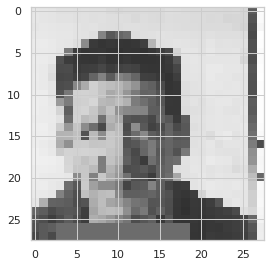

(1, 28, 28, 3)


In [ ]:
img_path = '/content/drive/My Drive/CriminalandNonCriminals/Train/Criminal/C1149.png'
img = image.load_img(img_path, target_size=(28, 28))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [ ]:
from keras.models import Model

In [ ]:
# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [ ]:
input_img='/content/drive/My Drive/CriminalandNonCriminals/Train/Criminal/C1149.png'

In [ ]:
from keras import backend as K

layer_name = 'block5_conv3'
filter_index = 0  # can be any integer from 0 to 511, as there are 512 filters in that layer

# build a loss function that maximizes the activation
# of the nth filter of the layer considered
layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, :, :, filter_index])

# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads]) 

ValueError: ignored